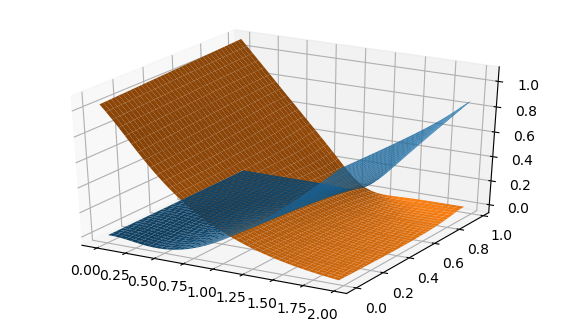

In [14]:
#Black Scholes Solution Model
import numpy as np
from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


fig = plt.figure(figsize=(7,4), dpi=100)
ax = plt.axes(projection='3d')

# Data

T = 1; #maturity
K = 1.1; # strike price
r = 0.05; # risk−free interest rate
q = 0.02; # dividend rate
sigma = 0.4; # volatility

S=np.arange(0.01,2,0.05)
t=np.arange(0,T,0.025)
S,t=np.meshgrid(S,t)

#d1=(log(S/K)+(r-q+0.5*sigma^2)*(T-t))/(sigma*sqrt(T-t))

numerator1=(np.log10(S/K)+(r-q+(1/2)*sigma*sigma)*(T-t))
numerator2=(np.log10(S/K)+ (r-q-(1/2)*sigma*sigma)*(T-t))
denominator=sigma*np.sqrt(T-t)

#d2 = (log(S/K)+(r-q-0.5*sigma^2)*(T-t))/(sigma*sqrt(T-t))


d1=numerator1/denominator
d2=numerator2/denominator


#Call
cdf1c = norm.cdf(d1)
cdf2c = norm.cdf(d2)
Vc = S*np.exp(-q*(T-t))*cdf1c-K*np.exp(-r*(T-t))*cdf2c

#Put
cdf1p = norm.cdf(-d1)
cdf2p = norm.cdf(-d2)
Vp = K*np.exp(-r*(T-t))*(cdf2p)-S*np.exp(-q*(T-t))*(cdf1p)

#Vc(end,:) = max(S(end,:)−K,0);
#surf=ax.plot_surface(S,t,cdf1c)
#surf=ax.plot_surface(S,t,cdf2c)
#Call plot
surf1 = ax.plot_surface(S,t, Vc)
surf2 = ax.plot_surface(S,t, Vp)
plt.tight_layout()
plt.xlabel('x')
plt.ylabel('Time')
plt.title('Black-Scholes-Merton Solutions plot for a Call and a Put Option')

plt.show()
